In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('combined_csv.csv')

In [ ]:
df

In [ ]:
df.drop(df.loc[df['categori'] == 'TIDAK ADA DATA'].index, inplace=True)

In [ ]:
columns = ['pm10', 'so2', 'co', 'o3', 'no2', 'categori']
df = df[columns]

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['categori'].value_counts()

In [ ]:
cat = {
    'SEDANG' : 0,
    'BAIK' : 1,
    'TIDAK SEHAT' : 2,
    'SANGAT TIDAK SEHAT' : 3
}

In [ ]:
df['categori'] = df['categori'].map(cat)

In [ ]:
df

In [ ]:
df.drop(df.loc[df['pm10'] == '---'].index, inplace=True)
df.drop(df.loc[df['so2'] == '---'].index, inplace=True)
df.drop(df.loc[df['co'] == '---'].index, inplace=True)
df.drop(df.loc[df['o3'] == '---'].index, inplace=True)
df.drop(df.loc[df['no2'] == '---'].index, inplace=True)

In [ ]:
df['categori'].value_counts()

In [ ]:
print(df)

In [2]:
df = pd.read_csv('ispu_dataset_jakarta.csv')

<AxesSubplot:>

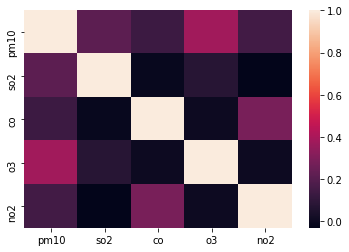

In [3]:
sns.heatmap(df.drop('categori', axis=1).corr())

In [4]:
df

,pm10,so2,co,o3,no2,categori
0,64.0,20.0,22.0,62.0,18.0,0
1,61.0,20.0,22.0,63.0,20.0,0
2,62.0,20.0,20.0,63.0,19.0,0
3,57.0,19.0,16.0,65.0,17.0,0
4,54.0,21.0,20.0,90.0,18.0,0
...,...,...,...,...,...,...
2331,65.0,23.0,10.0,110.0,9.0,2
2332,72.0,22.0,12.0,131.0,8.0,2
2333,58.0,24.0,9.0,102.0,7.0,2
2334,65.0,22.0,12.0,115.0,8.0,2


In [5]:
X = df.drop('categori', axis=1)
y = df['categori']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
gaussian_nb = GaussianNB()

gaussian_nb = gaussian_nb.fit(X_train, y_train)

y_pred = gaussian_nb.predict(X_test)

# evaluating the gaussian_nb performance
print('Training Accuracy :', gaussian_nb.score(X_train, y_train))
print('Testing Accuracy :', gaussian_nb.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.9412844036697248
Testing Accuracy : 0.9457917261055635

Confusion matrix
[[488   7   0   0]
 [ 15  86   0   0]
 [ 14   0  86   2]
 [  0   0   0   3]]

Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       495
           1       0.92      0.85      0.89       101
           2       1.00      0.84      0.91       102
           3       0.60      1.00      0.75         3

    accuracy                           0.95       701
   macro avg       0.87      0.92      0.88       701
weighted avg       0.95      0.95      0.95       701



In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# evaluating the decision_tree performance
print('Training Accuracy :', dt.score(X_train, y_train))
print('Testing Accuracy :', dt.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 0.998776758409786
Testing Accuracy : 1.0

Confusion matrix
[[495   0   0   0]
 [  0 101   0   0]
 [  0   0 102   0]
 [  0   0   0   3]]

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00         3

    accuracy                           1.00       701
   macro avg       1.00      1.00      1.00       701
weighted avg       1.00      1.00      1.00       701



In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# evaluating the decision_tree performance
print('Training Accuracy :', rf.score(X_train, y_train))
print('Testing Accuracy :', rf.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 1.0

Confusion matrix
[[495   0   0   0]
 [  0 101   0   0]
 [  0   0 102   0]
 [  0   0   0   3]]

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       101
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00         3

    accuracy                           1.00       701
   macro avg       1.00      1.00      1.00       701
weighted avg       1.00      1.00      1.00       701



In [15]:
import joblib

In [26]:
X_pred = pd.read_csv('predict.csv')

In [16]:
joblib.dump(gaussian_nb, 'gnb.skl')

['gnb.skl']

In [17]:
gnb_model = joblib.load('gnb.skl')

In [27]:
gnb_model.predict(X_pred)

array([0, 1, 0, 0, 1, 3, 3], dtype=int64)

In [20]:
joblib.dump(dt, 'dt.skl')

['dt.skl']

In [21]:
dt_model = joblib.load('dt.skl')

In [28]:
dt_model.predict(X_pred)

array([0, 1, 2, 0, 1, 3, 3], dtype=int64)

In [23]:
joblib.dump(rf, 'rf.skl')

['rf.skl']

In [24]:
rf_model = joblib.load('rf.skl')

In [29]:
rf_model.predict(X_pred)

array([0, 1, 2, 0, 1, 3, 3], dtype=int64)